In [3]:
import os
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

In [4]:
mp=pd.read_csv('spam1.csv')
mp.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
142,ham,A swt thought: \Nver get tired of doing little...,NaN,NaN,NaN
2632,ham,I WILL CAL YOU SIR. In meeting,NaN,NaN,NaN
5379,ham,Somebody set up a website where you can play h...,NaN,NaN,NaN
1452,ham,"That's good, because I need drugs",NaN,NaN,NaN
3312,ham,"Huh... Hyde park not in mel ah, opps, got conf...",NaN,NaN,NaN


In [5]:
mp.shape

(5572, 5)

In [6]:
mp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [14]:
mp.rename(columns={'v1':'target','v2':'message'},inplace=True)

In [15]:
mp.sample(5)

,target,message,Unnamed: 2,Unnamed: 3,Unnamed: 4
4181,spam,Urgent! Please call 0906346330. Your ABTA comp...,NaN,NaN,NaN
1347,ham,She doesnt need any test.,NaN,NaN,NaN
5324,ham,"Dear Sir,Salam Alaikkum.Pride and Pleasure mee...",NaN,NaN,NaN
4827,ham,Lol no. Just trying to make your day a little ...,NaN,NaN,NaN
1242,ham,Nobody can decide where to eat and dad wants C...,NaN,NaN,NaN


In [16]:
from sklearn.preprocessing import LabelEncoder 
encoder = LabelEncoder()
encoder.fit_transform(mp['target'])

array([0, 0, 1, ..., 0, 0, 0])

In [17]:
mp['target']=encoder.fit_transform(mp['target'])

In [18]:
mp.head()

,target,message,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,0,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,0,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,0,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,0,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [19]:
#checking how many missing values are present in this dataset 
mp.isnull().sum()

target           0
message          0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [20]:
#cheaking for duplicate values
mp.duplicated().sum()

403

In [21]:
#after removing duplicates
mp=mp.drop_duplicates(keep='first')
#checking after removing how many duplicate values are present 
mp.duplicated().sum()

0

In [22]:
#after removing duplicate values about remaining dataset 
mp.shape

(5169, 5)

In [23]:
mp.head()

,target,message,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,0,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,0,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,0,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,0,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [24]:
#here our cleaning part is completed now our task is to do eda
mp['target'].value_counts()

0    4516
1     653
Name: target, dtype: int64

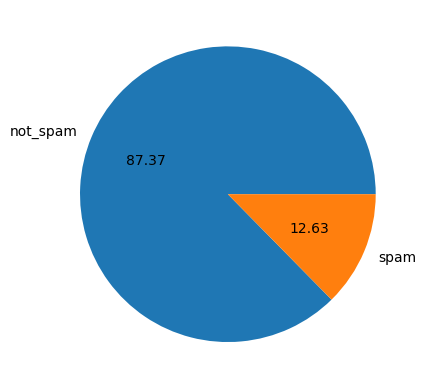

In [25]:
import matplotlib.pyplot as plt 
plt.pie(mp['target'].value_counts(),labels=['not_spam','spam'],autopct="%0.2f")
#here we use autopcts of watch value after two decimal 
plt.show()

In [26]:
# from here we see that our data imbalanced

In [27]:
import nltk # nltk full (natural language tool kit )
nltk.download('punkt')
#this line ran by us because some depandencies are required for the runing of nltk command

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Welcome\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [28]:
# so, we are going make three new columns 1>no. of character in sms
# 2> no. of words in sms 3>no.of sentences in the sms 

mp['num_charaters']=mp['message'].apply(len)
# here we created a new in the column in dataset which can show number of character present in the message 

C:\Users\Welcome\AppData\Local\Temp\ipykernel_12612\2364896190.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mp['num_charaters']=mp['message'].apply(len)


In [29]:
mp.head()

,target,message,Unnamed: 2,Unnamed: 3,Unnamed: 4,num_charaters
0,0,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN,111
1,0,Ok lar... Joking wif u oni...,NaN,NaN,NaN,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN,155
3,0,U dun say so early hor... U c already then say...,NaN,NaN,NaN,49
4,0,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN,61
